# Players Weight/Height

Hello, here is some basic informations about the players in the NHL from 2008-2024. I took the the data from moneypucks.
Furthermore, the weight may not be the best accurate because it will differ between seasons, but also NHL teams are known to inflate the total by some pounds.

In [2]:
%matplotlib inline

In [3]:
from ydata_profiling import ProfileReport

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

# Full path to your CSV file
file_path = r'C:\Users\Good_\Desktop\Python\Project NHL\allPlayersLookup.csv'

# Reading the CSV file into a DataFrame
df = pd.read_csv(file_path)
df = df.dropna()
# Displaying the contents of the DataFrame
print(df)

      playerId               name position team   birthDate  weight  height  \
0      8478421         A.J. Greer        L  CGY  1996-12-14   210.0   6' 3"   
1      8477180         Aaron Dell        G  SJS  1989-05-04   205.0   6' 0"   
2      8465992       Aaron Downey        R  DET  1974-08-27   215.0   6' 1"   
3      8477932       Aaron Ekblad        D  FLA  1996-02-07   220.0   6' 4"   
4      8471451       Aaron Gagnon        C  WPG  1986-04-24   186.0  5' 11"   
...        ...                ...      ...  ...         ...     ...     ...   
3149   8475876      Zane McIntyre        G  BOS  1992-08-20   206.0   6' 2"   
3150   8469760    Zbynek Michalek        D  ARI  1982-12-23   210.0   6' 2"   
3151   8465009        Zdeno Chara        D  NYI  1977-03-18   250.0   6' 9"   
3152   8476878  Zemgus Girgensons        L  BUF  1994-01-05   211.0   6' 2"   
3153   8469820      Zenon Konopka        C  BUF  1981-01-02   213.0   6' 0"   

     nationality shootsCatches  primaryNumber prima

Here, we cleaned some of the data and transformed them into cms and kg, unfortunately because of the american height measure, it can not be accurate for the height.

In [5]:
# Convert all height values to strings and handle missing values
df['height'] = df['height'].astype(str).fillna("0' 0\"")

# Function to convert height from "6' 3\"" to centimeters
def convert_height_to_cm(height_str):
    try:
        # Split the string by the feet and inches symbols
        feet, inches = height_str.split("' ")
        inches = inches.replace('"', '')
        
        # Convert to inches
        total_inches = int(feet) * 12 + int(inches)
        
        # Convert inches to centimeters
        return total_inches * 2.54
    except ValueError:
        # Return NaN if there is an error in conversion
        return float('nan')

# Apply the conversion function to the 'height' column
df['height'] = df['height'].apply(convert_height_to_cm)


# Convert weight from lbs to kg
df['weight'] = df['weight'] * 0.453592

In [6]:
# Keeping only the columns: weight, height, nationality, and position
df_selected = df[['weight', 'height', 'nationality', 'position']]



# Display the result
print(df_selected)

          weight  height nationality position
0      95.254320  190.50         CAN        L
1      92.986360  182.88         CAN        G
2      97.522280  185.42         CAN        R
3      99.790240  193.04         CAN        D
4      84.368112  180.34         CAN        C
...          ...     ...         ...      ...
3149   93.439952  187.96         USA        G
3150   95.254320  187.96         CZE        D
3151  113.398000  205.74         SVK        D
3152   95.707912  187.96         LVA        L
3153   96.615096  182.88         CAN        C

[2976 rows x 4 columns]


In [7]:
# Generate the profiling report
profile = ProfileReport(df_selected, title="Pandas Profiling Report")

# Save the report as an HTML file
profile.to_file("report.html")

C:\Users\Good_\AppData\Local\Programs\Python\Python312\Lib\site-packages\ydata_profiling\utils\dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Here, it opens from the package ProfilReport, given an nice overview.

In [8]:
import webbrowser

# Open the report in the default web browser
webbrowser.open("report.html")

True

Now, we gonna try to illustrate with matplotlib

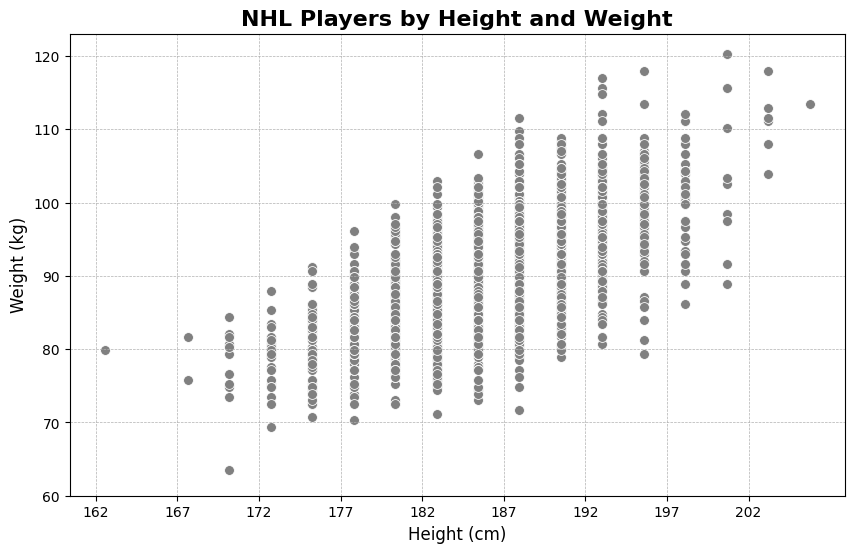

In [9]:
# Assuming your data is already loaded into a DataFrame df
# Ensure height and weight columns are correctly named and in the right units

# Check the minimum and maximum height values
min_height = df['height'].min()
max_height = df['height'].max()

# Create a scatter plot with seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='height', y='weight', s=50, color='gray')

# Customize the plot
plt.title("NHL Players by Height and Weight", fontsize=16, fontweight='bold')
plt.xlabel("Height (cm)", fontsize=12)
plt.ylabel("Weight (kg)", fontsize=12)

# Adjusting the ticks for height in cm based on actual data range
plt.xticks(range(int(min_height), int(max_height) + 1, 5))  # Adjust step size as needed

# Adjust the y-axis ticks for weight in kg
plt.yticks(range(60, 130, 10))

# Add a grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()

In [10]:
print(df[df['weight'] == df['weight'].min()])
print(df[df['weight'] == df['weight'].max()])
print(df[df['height'] == df['height'].min()])
print(df[df['height'] == df['height'].max()])

      playerId              name position team   birthDate    weight  height  \
2050   8479547  Matthew Phillips        R  WSH  1998-04-06  63.50288  170.18   

     nationality shootsCatches  primaryNumber primaryPosition  
2050         CAN             R           41.0               C  
      playerId             name position team   birthDate     weight  height  \
850    8469647   Derek Boogaard        L  NYR  1982-06-23  120.20188  200.66   
2305   8477997  Nikita Tryamkin        D  VAN  1994-08-30  120.20188  200.66   

     nationality shootsCatches  primaryNumber primaryPosition  
850          CAN             L           94.0               L  
2305         RUS             L           88.0               D  
      playerId          name position team   birthDate     weight  height  \
2224   8471804  Nathan Gerbe        C  CBJ  1987-07-24  79.832192  162.56   

     nationality shootsCatches  primaryNumber primaryPosition  
2224         USA             L           24.0              

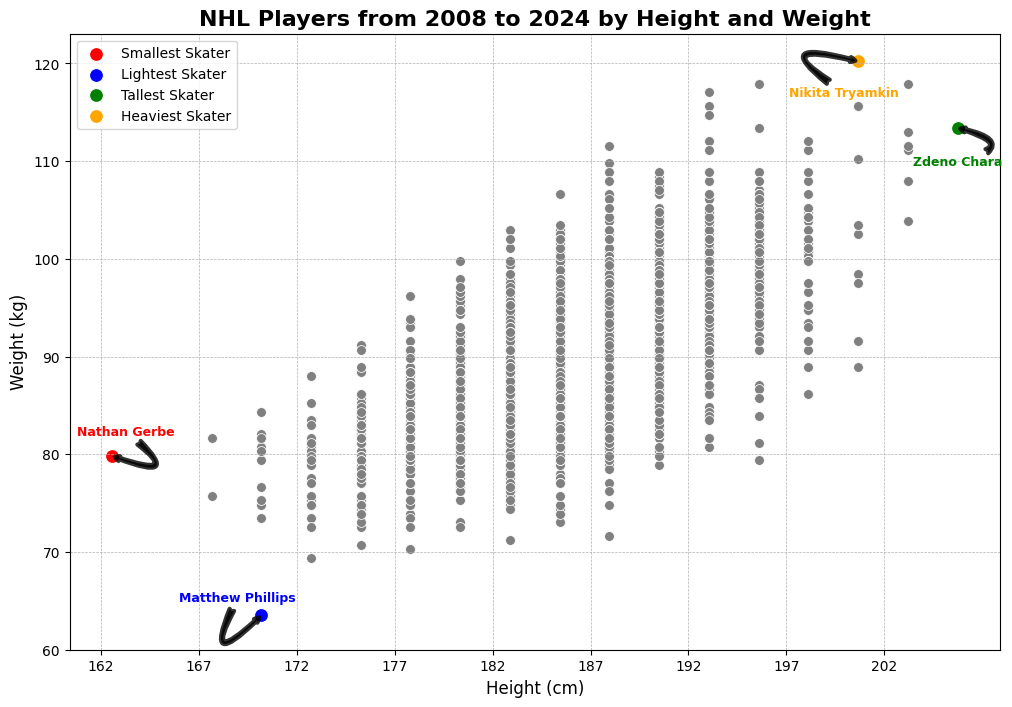

In [11]:


# Assuming df is already defined and loaded with data

# Find the minimum and maximum height and weight values
min_height = df['height'].min()
max_height = df['height'].max()
min_weight = df['weight'].min()
max_weight = df['weight'].max()

# Get the data for the smallest, lightest, tallest, and heaviest skaters
smallest_skaters = df[df['height'] == min_height]
lightest_skaters = df[df['weight'] == min_weight]
tallest_skaters = df[df['height'] == max_height]
heaviest_skaters = df[df['weight'] == max_weight]

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='height', y='weight', s=50, color='gray')

# Highlight the smallest skater(s) in red
sns.scatterplot(data=smallest_skaters, x='height', y='weight', s=100, color='red', label='Smallest Skater')

# Highlight the lightest skater(s) in blue
sns.scatterplot(data=lightest_skaters, x='height', y='weight', s=100, color='blue', label='Lightest Skater')

# Highlight the tallest skater(s) in green
sns.scatterplot(data=tallest_skaters, x='height', y='weight', s=100, color='green', label='Tallest Skater')

# Highlight the heaviest skater(s) in orange
sns.scatterplot(data=heaviest_skaters, x='height', y='weight', s=100, color='orange', label='Heaviest Skater')

# Annotate the smallest skater(s)
for i, row in smallest_skaters.iterrows():
    player_name = row['name']  # Assuming there's a 'name' column for player names
    plt.annotate(f'{player_name}', 
                 (row['height'], row['weight']),
                 textcoords="offset points", 
                 xytext=(10,15), 
                 ha='center', 
                 fontsize=9, 
                 color='red',
                weight='bold',
       arrowprops=dict(
                 arrowstyle='fancy',  # Fancy arrowhead
                 connectionstyle='arc3,rad=-3',  # Larger curvature radius for longer appearance
                 color='black',  # Arrow color
                 linewidth=3,  # Thicker line for visibility
                 alpha=0.8))  # Higher transparency

# Annotate the lightest skater(s)
for i, row in lightest_skaters.iterrows():
    player_name = row['name']  # Assuming there's a 'name' column for player names
    plt.annotate(f'{player_name}', 
                 (row['height'], row['weight']),
                 textcoords="offset points", 
                 xytext=(-17,10), 
                 ha='center', 
                 fontsize=9, 
                 color='blue',
                weight='bold',
                   arrowprops=dict(
                 arrowstyle='fancy',  # Fancy arrowhead
                 connectionstyle='arc3,rad=3',  # Larger curvature radius for longer appearance
                 color='black',  # Arrow color
                 linewidth=3,  # Thicker line for visibility
                 alpha=0.8))  # Higher transparency

# Annotate the tallest skater(s)
for i, row in tallest_skaters.iterrows():
    player_name = row['name']  # Assuming there's a 'name' column for player names
    plt.annotate(f'{player_name}', 
                 (row['height'], row['weight']),
                 textcoords="offset points", 
                 xytext=(0,-27), 
                 ha='center', 
                 fontsize=9, 
                 color='green',
                weight='bold',
                 arrowprops=dict(
                 arrowstyle='fancy',  # Fancy arrowhead
                 connectionstyle='arc3,rad=2',  # Larger curvature radius for longer appearance
                 color='black',  # Arrow color
                 linewidth=3,  # Thicker line for visibility
                 alpha=0.8))  # Higher transparency
# Annotate only Nikita Tryamkin among the heaviest skaters
for i, row in heaviest_skaters.iterrows():
    player_name = row['name']  # Assuming there's a 'name' column for player names
    
    if player_name == 'Nikita Tryamkin':
        plt.annotate(player_name, 
                     (row['height'], row['weight']),
                     textcoords="offset points", 
                     xytext=(-10, -25),  # Adjust these values as needed
                     ha='center', 
                     fontsize=9, 
                     color='orange',
                    weight='bold',
                     arrowprops=dict(
                 arrowstyle='fancy',  # Fancy arrowhead
                 connectionstyle='arc3,rad=-3',  # Larger curvature radius for longer appearance
                 color='black',  # Arrow color
                 linewidth=3,  # Thicker line for visibility
                 alpha=0.8))  # Higher transparency



# Customize the plot
plt.title("NHL Players from 2008 to 2024 by Height and Weight", fontsize=16, fontweight='bold')
plt.xlabel("Height (cm)", fontsize=12)
plt.ylabel("Weight (kg)", fontsize=12)

# Adjusting the ticks for height in cm based on actual data range
plt.xticks(range(int(min_height), int(max_height) + 1, 5))  # Adjust step size as needed

# Adjust the y-axis ticks for weight in kg
plt.yticks(range(60, 130, 10))

# Add a grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add a legend
plt.legend()

# Show the plot
plt.show()


Here, we see a representation of the weight and height. We can determine that around 90 kg and 187 cm are the average for the NHL players.

Furthermore, we found Chara (D) as the tallest and Gerbe (F) as the smallest players. We could have furthermore, divided by forwards and defenders to see the differences. 

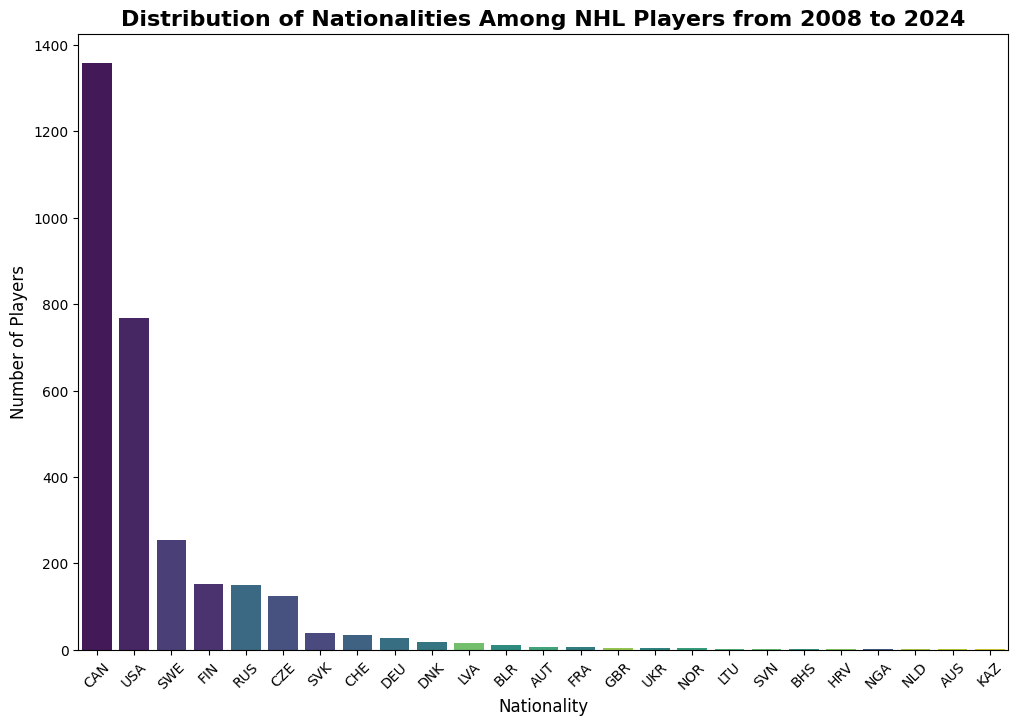

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the histogram
plt.figure(figsize=(12, 8))
x=df['nationality']
sns.countplot(data=df, x='nationality', order=df['nationality'].value_counts().index, palette='viridis', hue=x, legend=False)

# Customize the plot
plt.title("Distribution of Nationalities Among NHL Players from 2008 to 2024", fontsize=16, fontweight='bold')
plt.xlabel("Nationality", fontsize=12)
plt.ylabel("Number of Players", fontsize=12)
plt.xticks(rotation=45)  # Rotate x labels for better readability

# Show the plot
plt.show()


The nationalities present in the NHL with Canada and USA as big leaders. Nothing really new.